In [17]:
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
repair = pd.read_csv('repair2.csv')
repair2 = repair.copy()
repair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


In [4]:
# Date 이상치 점검
repair['date'] = pd.to_datetime(repair['date'])
repair['year'] = repair['date'].dt.year
repair['year'] = pd.to_numeric(repair['year'])
repair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               13262 non-null  int64         
 1   taskID               13260 non-null  object        
 2   originator           13260 non-null  object        
 3   eventtype            13257 non-null  object        
 4   contact              1000 non-null   object        
 5   RepairType           927 non-null    object        
 6   objectKey            927 non-null    float64       
 7   RepairInternally     927 non-null    object        
 8   EstimatedRepairTime  927 non-null    float64       
 9   RepairCode           927 non-null    float64       
 10  RepairOK             1854 non-null   object        
 11  date                 13249 non-null  datetime64[ns]
 12  time                 13249 non-null  object        
 13  year                 13249 non-

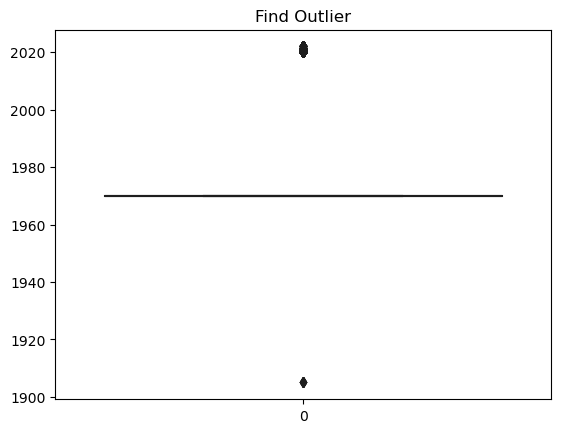

In [5]:
sns.boxplot(data = repair['year'], color = 'darkgreen')
plt.title('Find Outlier')
plt.show()

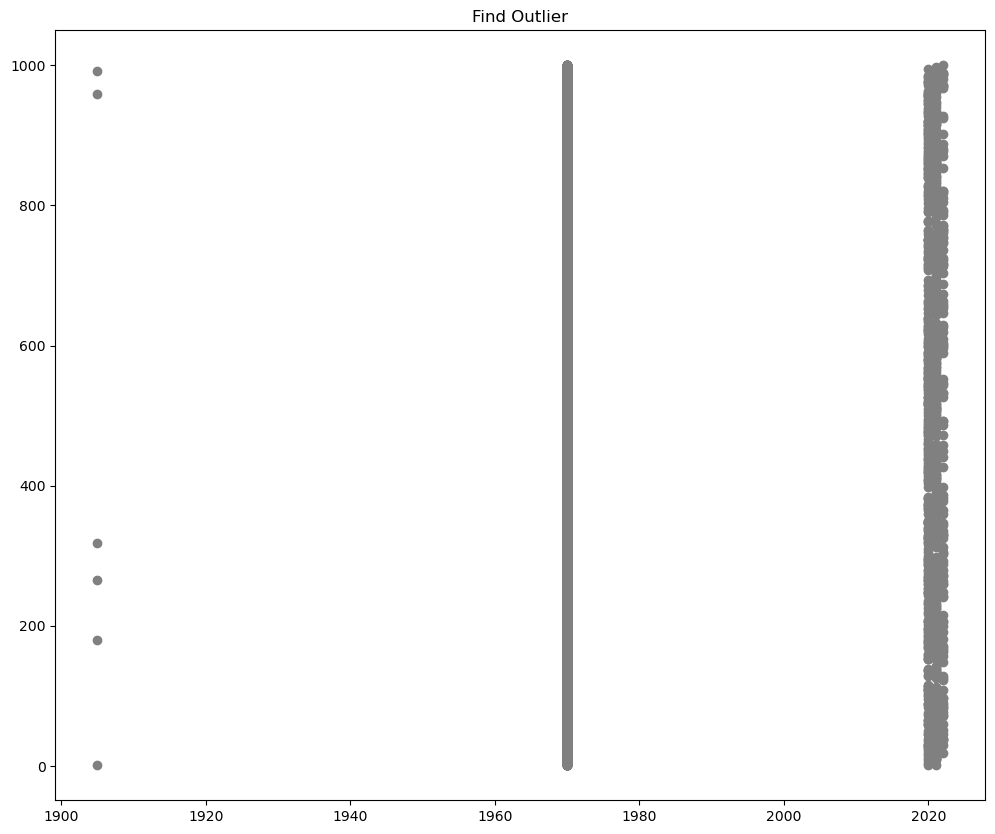

In [6]:
plt.figure(figsize = (12,10))
times = pd.to_datetime(repair['year'])  
plt.scatter(repair['year'], repair['caseID'], color = 'gray')
plt.title('Find Outlier')
plt.show()

In [13]:
#1970년대 contact 방법 확인

In [21]:
t1 = repair.loc[(repair.timestamp >='1970-01-01') & (repair.timestamp <='1970-12-31') ]

In [22]:
t1 = t1.dropna(subset = ['contact'])
t2 = t1[['caseID','contact']]
t3 = pd.get_dummies(t2.contact)
t4 = pd.concat([t2, t3], axis = 1)
t4.drop('contact', axis = 1, inplace = True)

Text(0.5, 1.0, "1970's Contact Method")

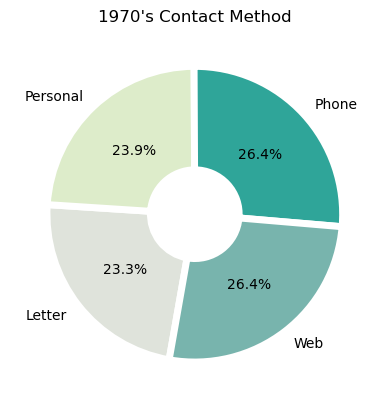

In [23]:
labels = ['Letter','Personal','Phone','Web'] ## 라벨
frequency = [220,226,250,250] ## 빈도
colors = ['#DFE3DB', '#DDECCA', '#2FA599', '#78B4AD']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(frequency, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('1970\'s Contact Method')

In [ ]:
# 확인 결과 1970년 연락 방법 Phone, web 이 제일 많았다.
# 하지만 1970년을 고려해 보았을 때 phone, web 비중이 높은 것이 오류라고 판단해 연도 변경

In [ ]:
# 연도바꾸기 및 이상치 제거

In [19]:
repair['timestamp'] = repair2['date'] +' ' + repair['time']

In [20]:
repair['timestamp'] = repair['timestamp'].str.replace('1970','2020')
repair['timestamp']  = pd.to_datetime(repair['timestamp'])

In [25]:
target = repair.loc[repair.timestamp >='2020-01-01']

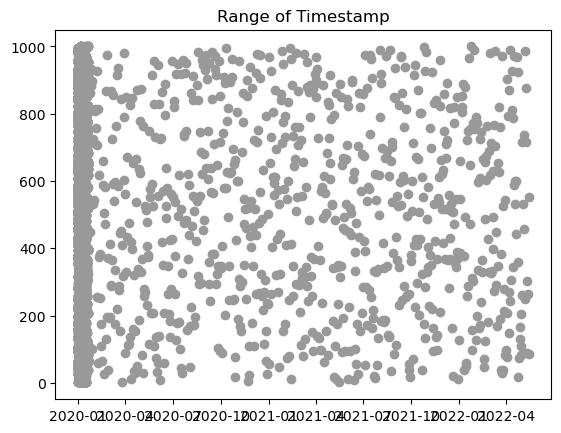

In [26]:
plt.scatter(target['timestamp'], target['caseID'], color = '#999999')
plt.title('Range of Timestamp')
plt.show()

In [32]:
target = target.drop(['date'], axis = 1)
target = target.drop(['time'], axis = 1)
target2 = target.sort_values(['caseID', 'timestamp'])

In [ ]:
# 업무별 프로세스 확인

In [46]:
target4 = target2[['caseID','taskID','originator','eventtype']]

In [ ]:
#프로세스 가장 많은 업무 확인

<AxesSubplot:xlabel='caseID', ylabel='taskID'>

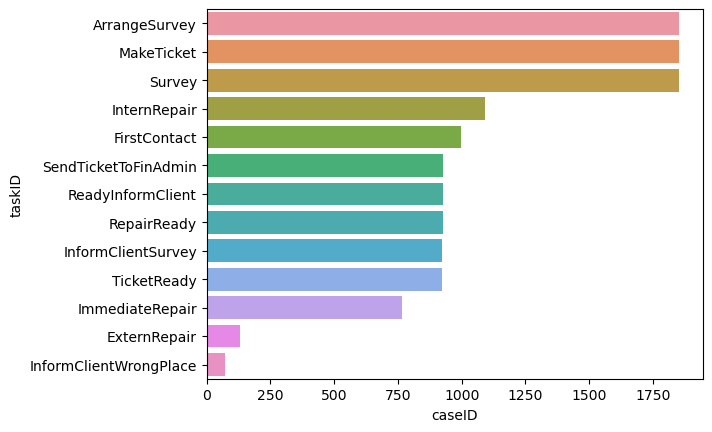

In [55]:
taskfreq = target4.groupby('taskID').count()
taskfreq = taskfreq['caseID']
taskfreq = pd.DataFrame(taskfreq)
taskfreq.reset_index(inplace = True)
taskfreq.sort_values('caseID', ascending = False, inplace= True)
sns.barplot(data = taskfreq, x='caseID',y='taskID')

In [56]:
target4 = target2[['caseID','taskID','originator','eventtype']]

In [57]:
task = pd.get_dummies(target4.taskID)
target4 = pd.concat([target4, task], axis = 1)
target4 = target4.drop('taskID', axis = 1)
target4 = target4.loc[target4['eventtype'] == 'complete'] 

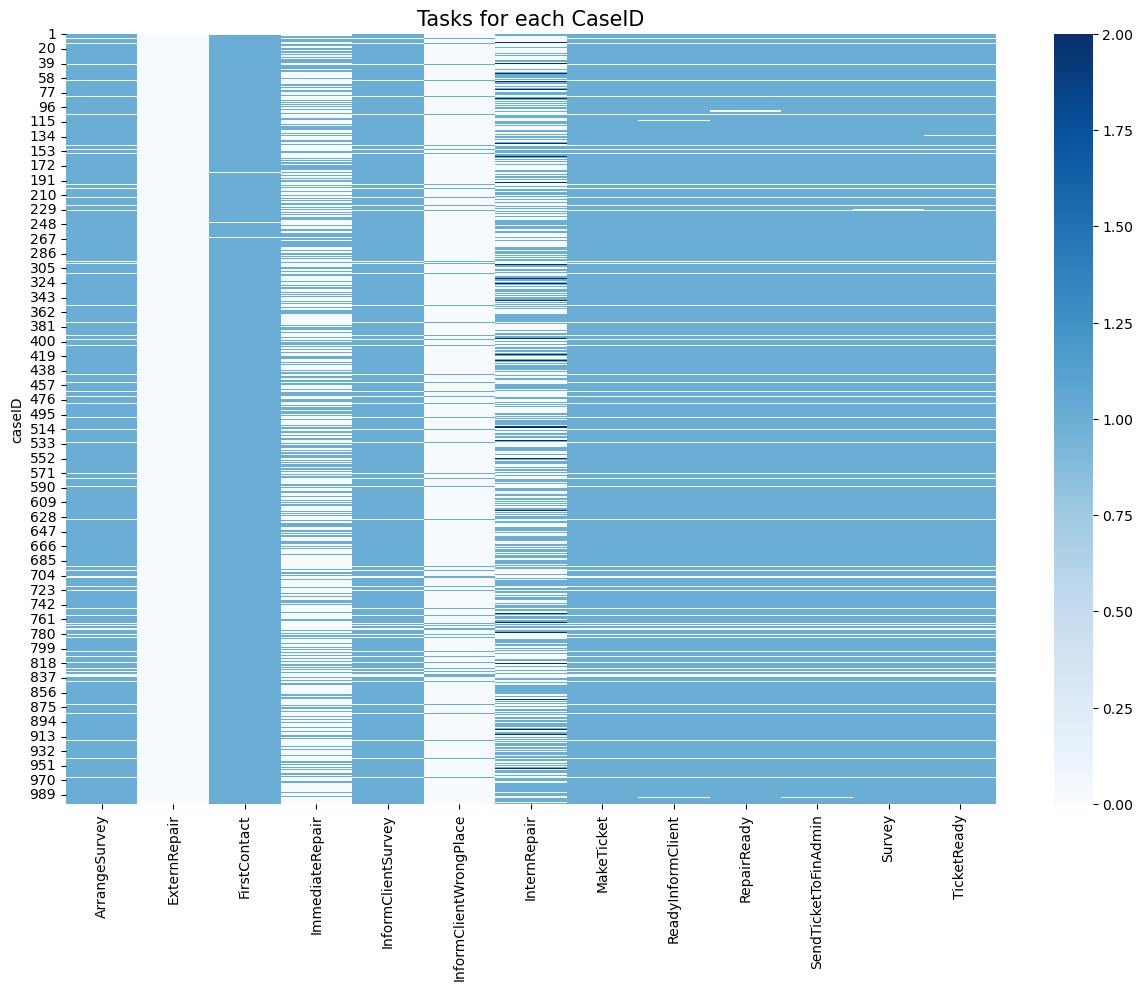

In [58]:
casegroup = target4.groupby('caseID').sum()

plt.figure(figsize=(15,10))
ax = sns.heatmap(casegroup,cmap='Blues',vmin=0, vmax=2)
plt.title('Tasks for each CaseID',fontsize=15)
plt.show() 

In [ ]:
# 사원별 업무 종류     

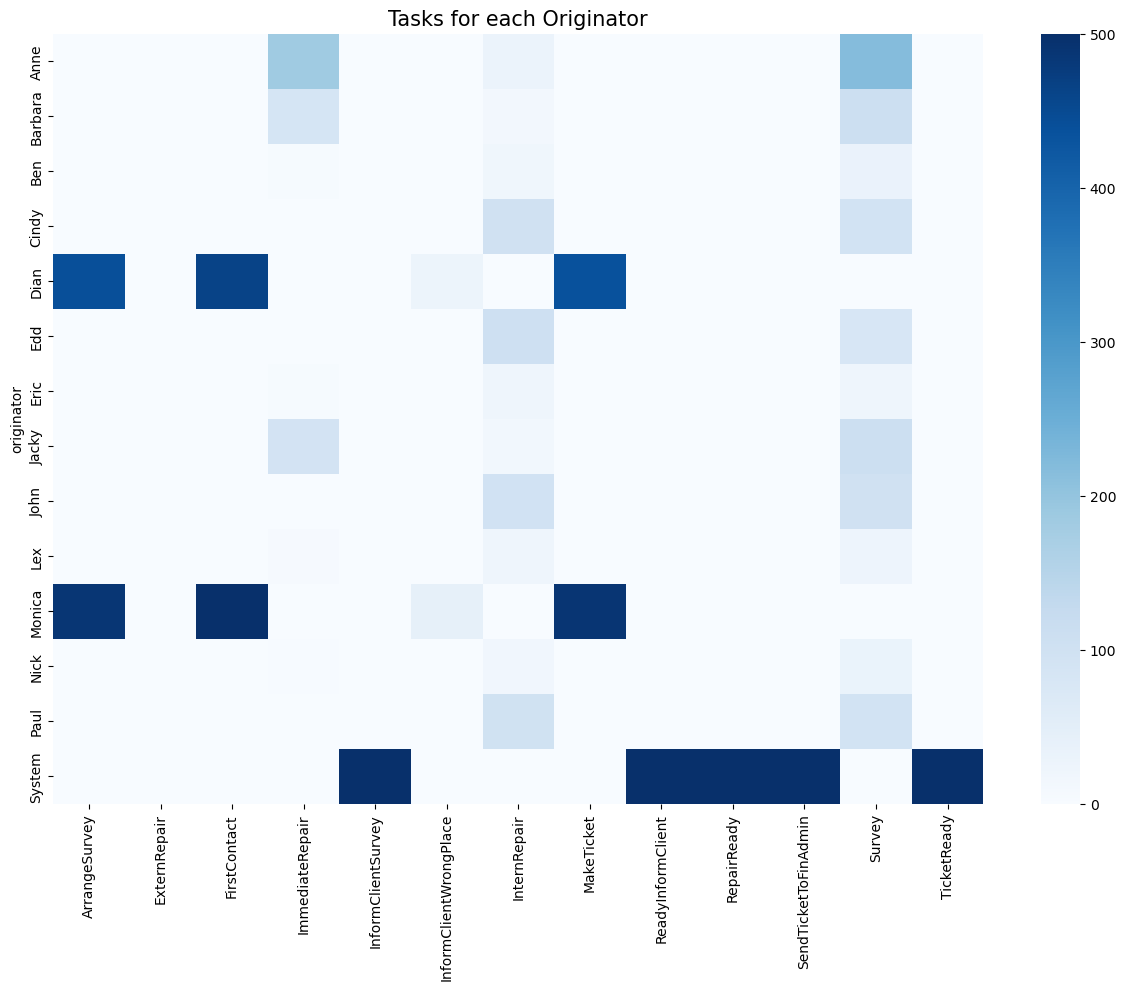

In [39]:
origin = target4.groupby('originator').sum()
origin = origin.drop('caseID', axis = 1)


plt.figure(figsize=(15,10))
ax = sns.heatmap(origin,cmap='Blues',vmax=500)
plt.title('Tasks for each Originator',fontsize=15)
plt.show() 

In [ ]:
# 사원별 업무 횟수 

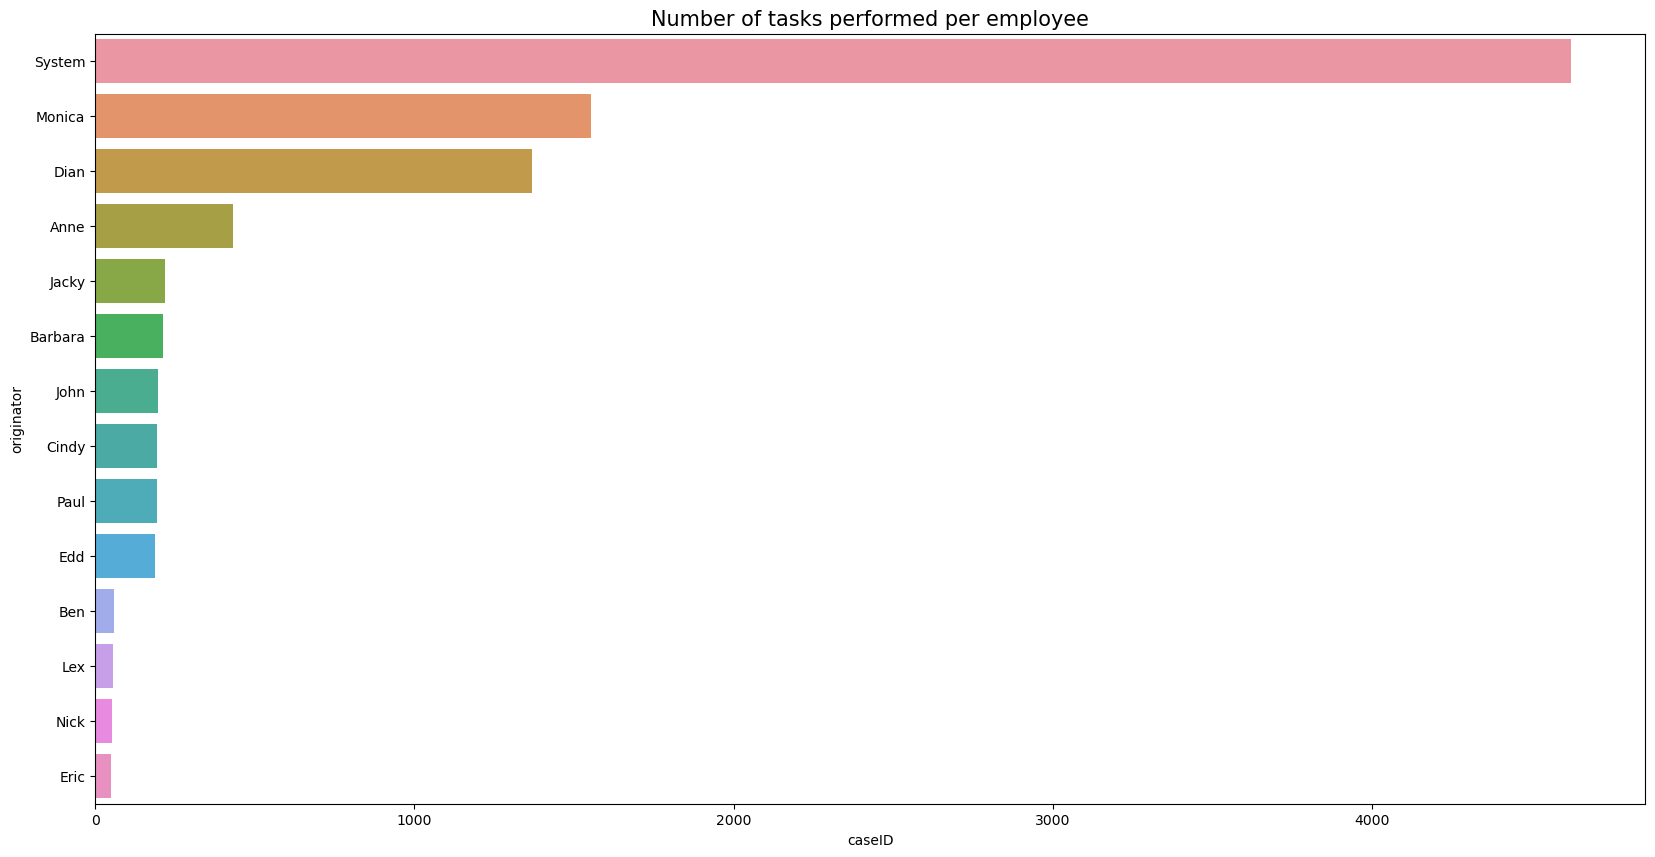

In [62]:
origin_count = target4.groupby('originator').count()
origin_count = origin_count['caseID']
origin_count = pd.DataFrame(origin_count)
origin_count.reset_index(inplace = True)
origin_count.sort_values('caseID', ascending = False, inplace = True)
plt.figure(figsize=(20,10))
sns.barplot(data = origin_count, x='caseID',y='originator')
plt.title('Number of tasks performed per employee',fontsize=15)
plt.show()

In [ ]:
#프로세스마이닝

In [64]:
import pm4py

In [63]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
from pm4py.objects.conversion.dfg import factory as dfg_mining_factory
from pm4py.visualization.process_tree import factory as pt_vis_factory
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.visualization.petrinet import factory as vis_factory
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.visualization.petrinet import factory as hn_vis_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory

In [65]:
p_target = target[['caseID','taskID','eventtype','timestamp']]
p_target = p_target[p_target.eventtype != 'start']
p_target.sort_values('caseID')
p_target = p_target.drop('eventtype', axis = 1)

colname = ['case:concept:name', 'concept:name', 'time:timestamp']
p_target.columns = colname

p_target['case:concept:name'] = p_target['case:concept:name'].astype(str)

In [66]:
#로그변환

In [67]:
log = log_converter.apply(p_target, variant=log_converter.Variants.TO_DATA_FRAME) 

In [ ]:
#DFG(Directly Follows Graph) 도출

C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\3805915871.py:4: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead
  net, im, fm = dfg_mining_factory.apply(dfg)
C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\3805915871.py:6: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  gviz = dfg_vis_factory.apply(dfg, log = log, variant='frequency')
C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\3805915871.py:7: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  dfg_vis_factory.view(gviz)


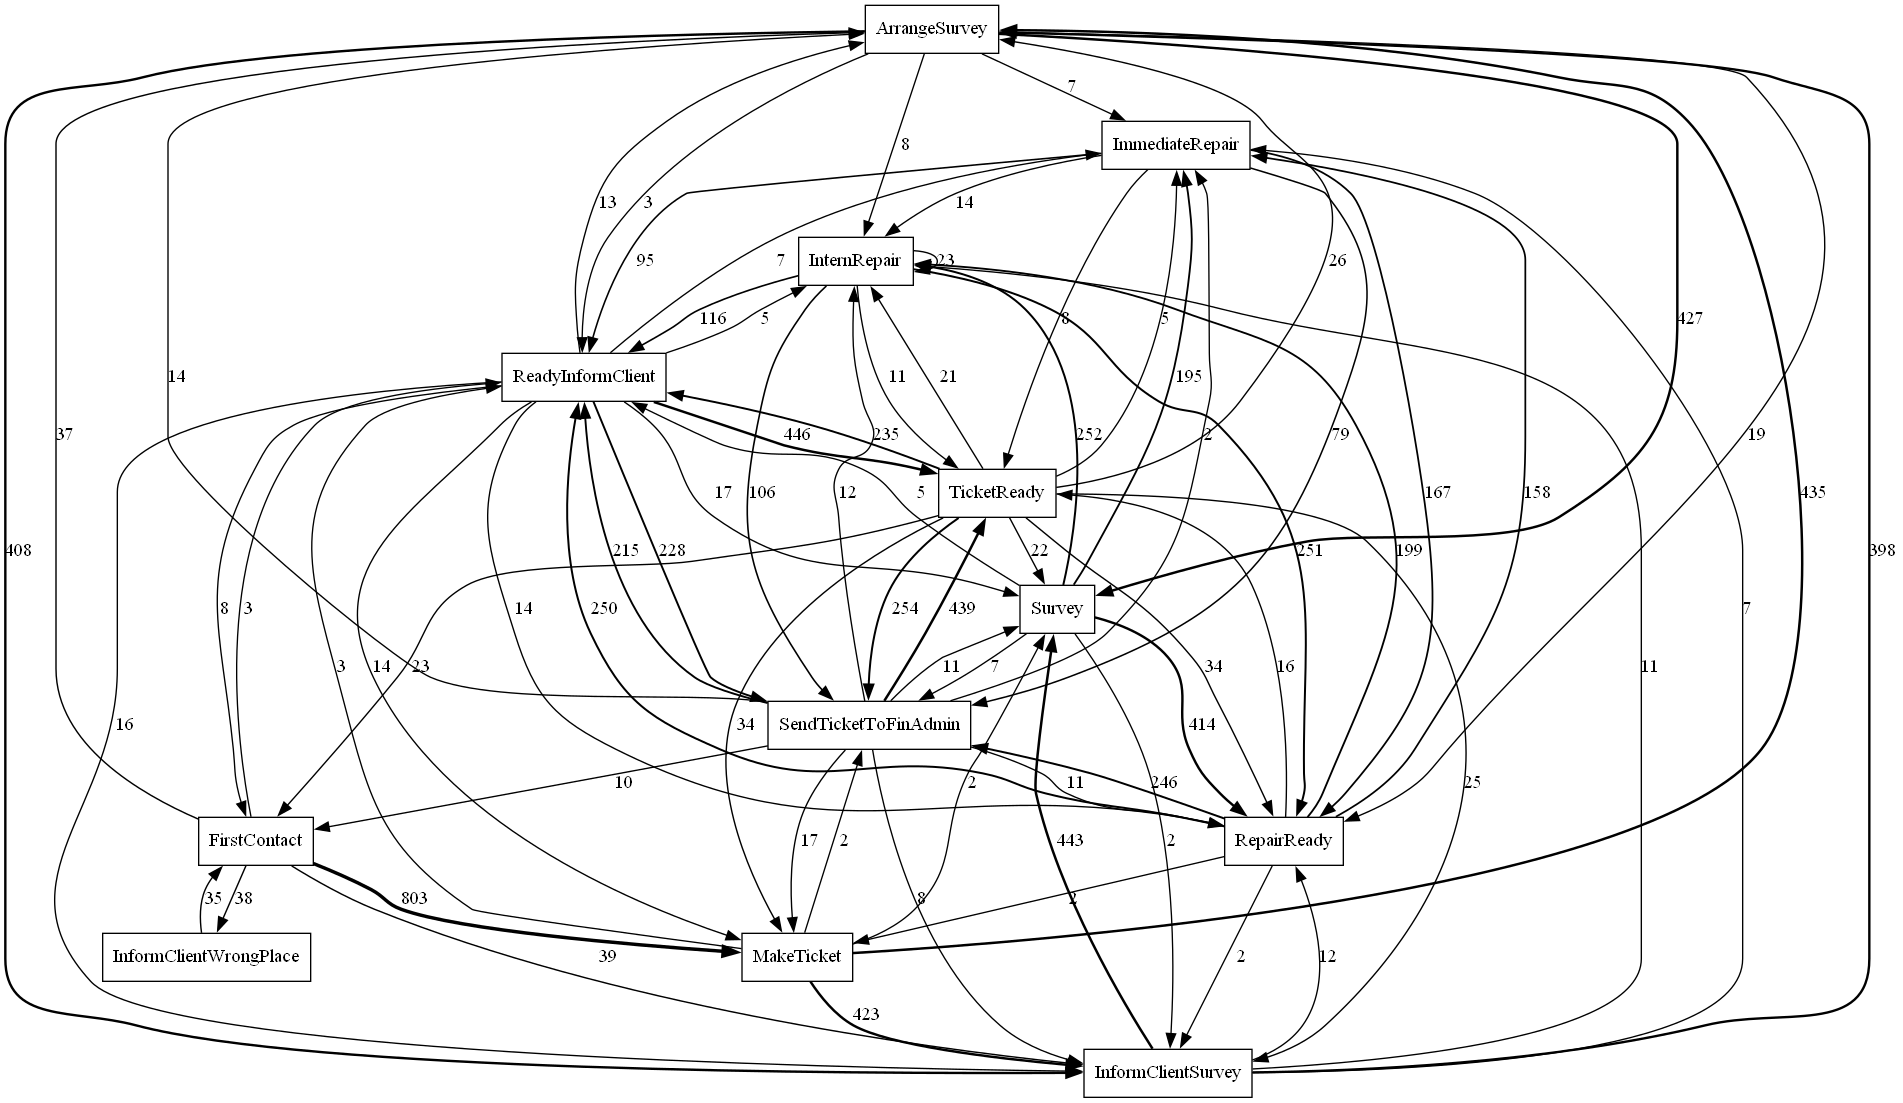

In [70]:
from pm4py.algo.discovery.dfg import algorithm as dfg_algorithm

dfg = dfg_algorithm.apply(log)
net, im, fm = dfg_mining_factory.apply(dfg)
     
gviz = dfg_vis_factory.apply(dfg, log = log, variant='frequency')
dfg_vis_factory.view(gviz)

C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\4124463866.py:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  gviz = dfg_vis_factory.apply(dfg, log = log, variant='performance')
C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\4124463866.py:2: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  dfg_vis_factory.view(gviz)


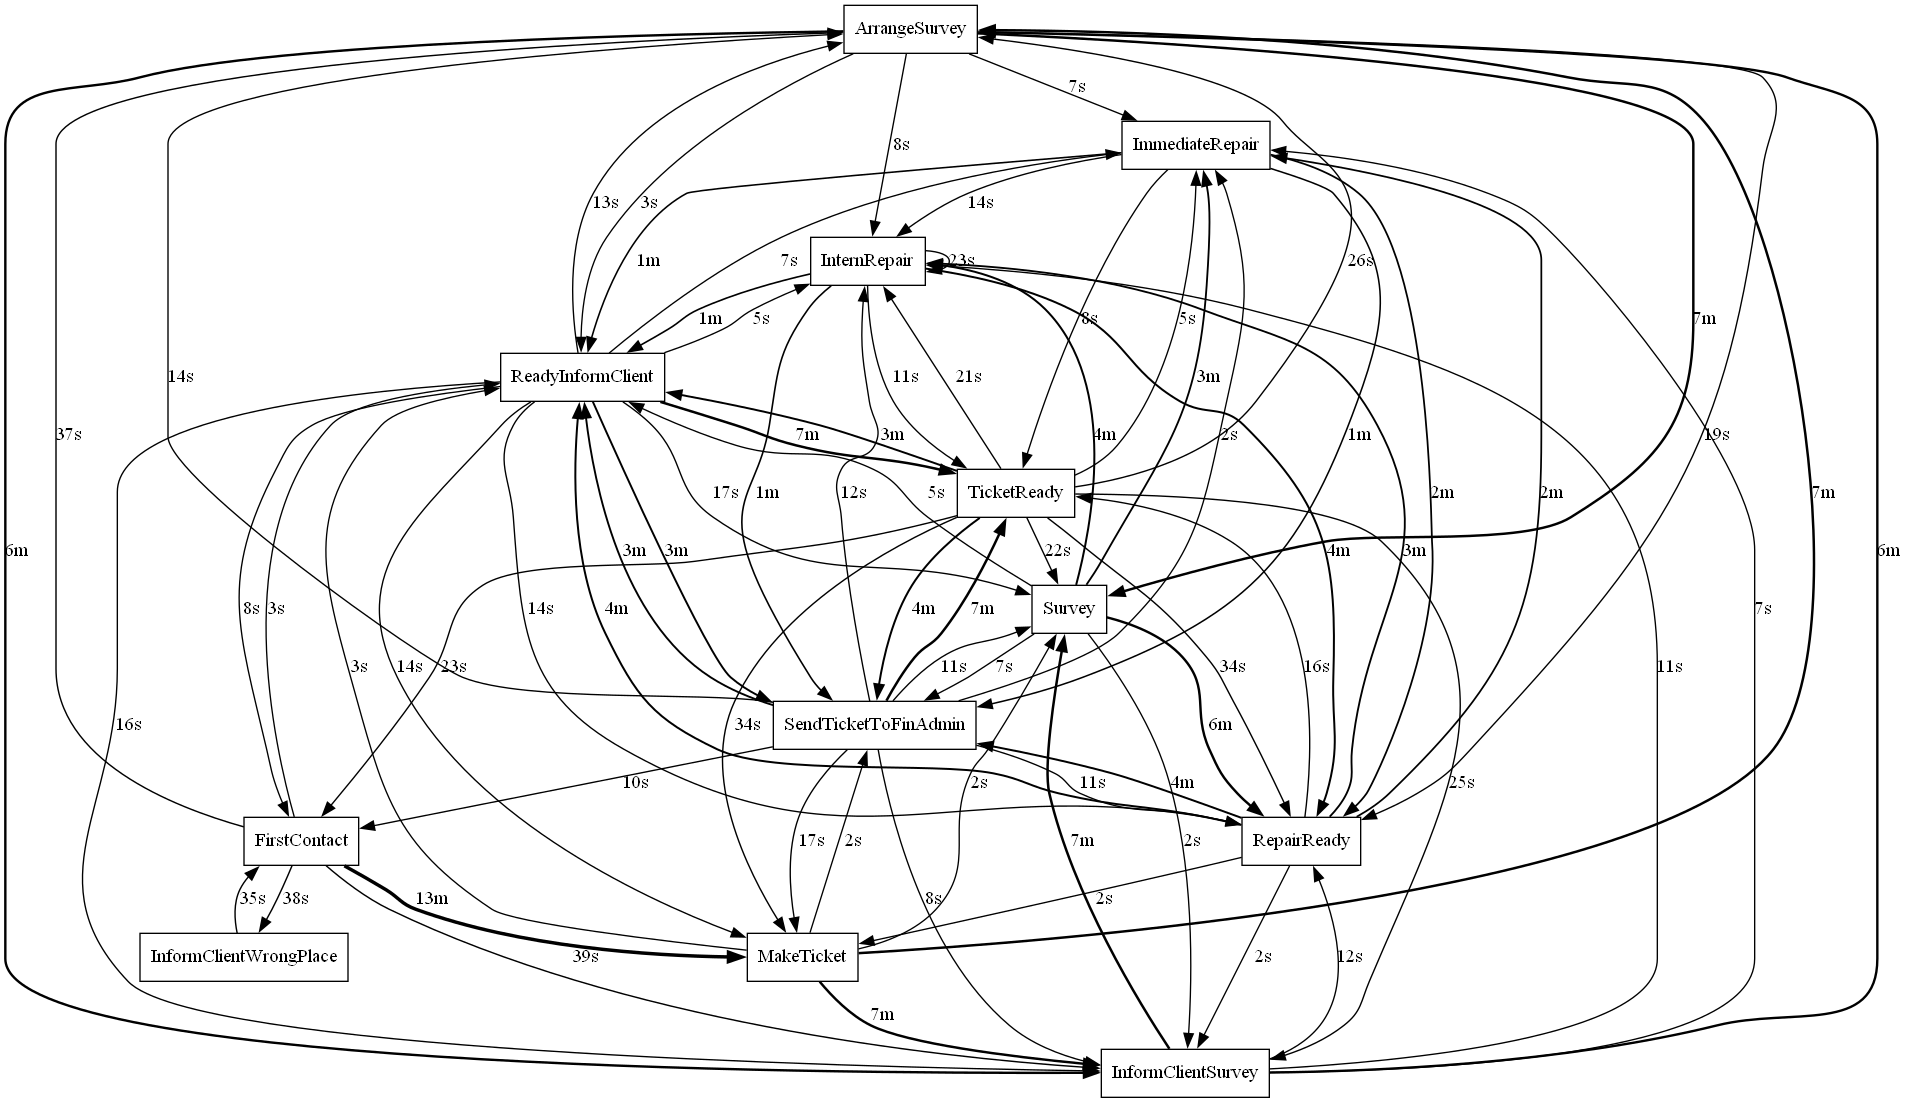

In [69]:
gviz = dfg_vis_factory.apply(dfg, log = log, variant='performance')
dfg_vis_factory.view(gviz)

In [ ]:
# 휴리스틱 

C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\1791388930.py:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead
  heu_net, heu_im, heu_fm = heuristics_miner.apply(log, parameters={'dependency_thresh':0.6, 'min_act_count':2})
C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\1791388930.py:4: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  gviz_heu = pn_vis_factory.apply(heu_net, heu_im, heu_fm)
C:\Users\Hyeryun\AppData\Local\Temp\ipykernel_28516\1791388930.py:5: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  pn_vis_factory.view(gviz_heu)


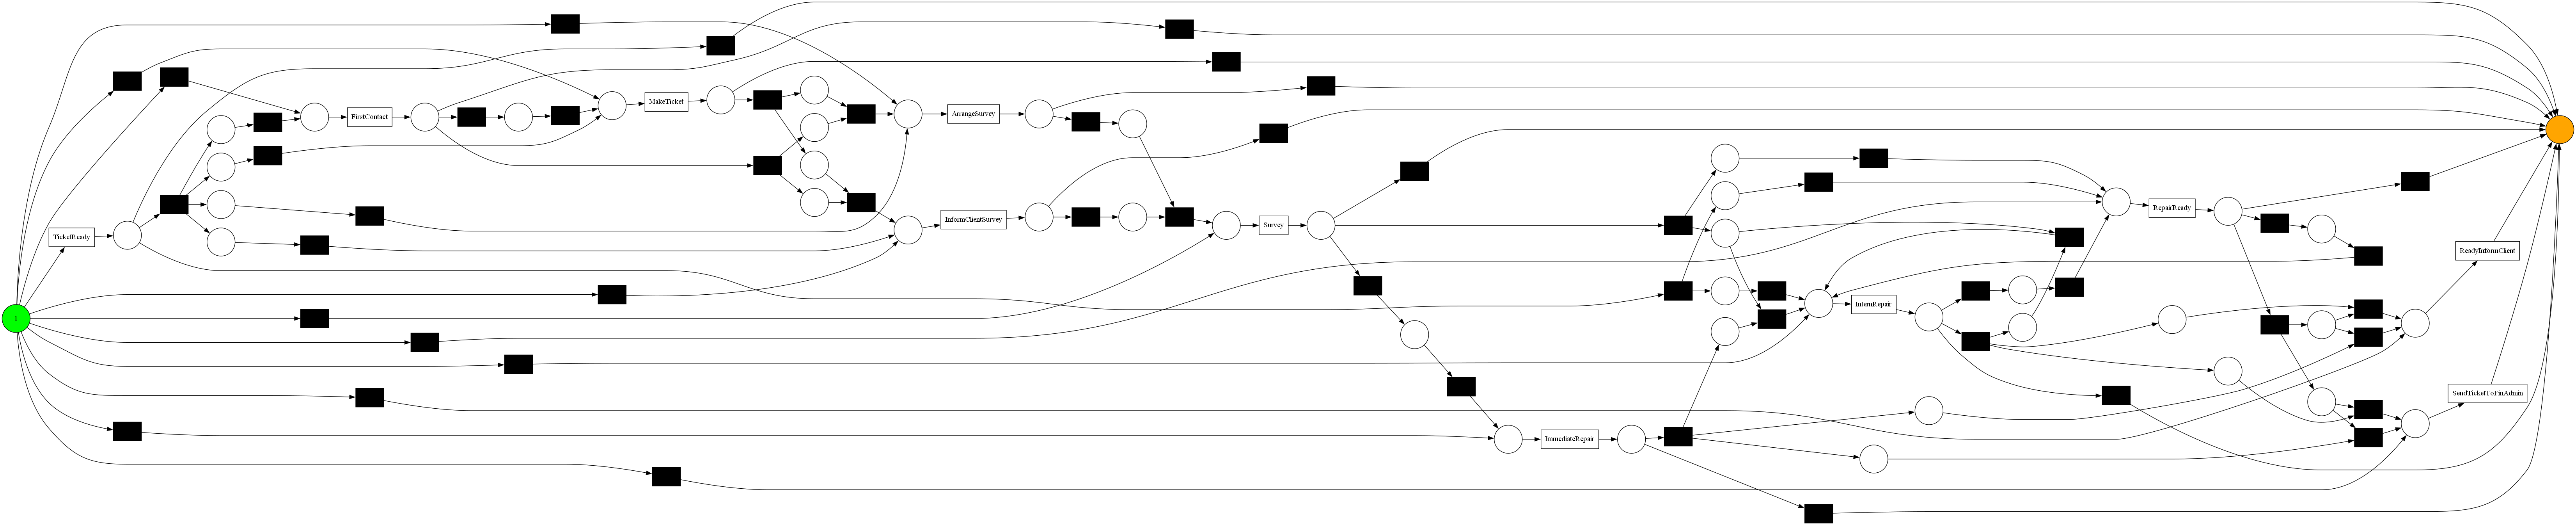

In [71]:
heu_net, heu_im, heu_fm = heuristics_miner.apply(log, parameters={'dependency_thresh':0.6, 'min_act_count':2})
     

gviz_heu = pn_vis_factory.apply(heu_net, heu_im, heu_fm)
pn_vis_factory.view(gviz_heu)